# Лабораторная работа № 7. Численные методы решения систем дифференциальных уравнений.

#### Выполнил студент группы 426, Иванов Александр Андреевич.

## Вариант № 03

Решить методом Тейлора 2-го порядка задачу Коши


\begin{equation} 
y'' + y = x*exp(-x), \quad   y(0) = 1,y'(0) = 0, \quad x  \in [0,2]
\end{equation}


с заданной относительной точностью 0,01.
 
## Теоретическая часть 

#### $\quad$  Метод разложения в ряд Тейлора
Простейшим способом построения приближенного решения в точке  $\: x_{n+1} \:$  сетки  $\: \omega_{N} \:$ является способ, основанный на разложении решения в ряд Тейлора в предыдущей точке сетки $\: x_{n} \:$ по степеням шага h:


\begin{equation} 
y( x_{n+1}) = y( x_{n}) + h \bigtriangleup( x_{n}, y_{n}, h),
\end{equation}

\begin{equation} 
\bigtriangleup(x, y, h)  \equiv y'(x) +  \frac{h}{2}y''(x) +  \frac{ h^{2} }{3!}y'''(x) + . . . .   
\end{equation}

Взяв вместо этого ряда конечный его отрезок

\begin{equation} 
\ \varphi_{p}(x, y, h)  \equiv   y'(x) +  \frac{h}{2}y''(x) + ... +  \frac{h^{p-1} }{p!}y^{(p)}(x) 
\end{equation}


и заменяя в нем производные $y^{k}(x)$в силу дифференциального уравнения 
\begin{equation} 
\begin{cases}y'(x) = f(x,y(x)), x \in (a,b)\\ y(a) =  y^{0} \end{cases} 
\end{equation}

получаем последовательность приближений

\begin{equation} 
y_{n+1} =  x_{n} + h \varphi_{p}( x_{n}, y_{n},h), n = 0,1,2,...  
\end{equation}

Отсюда, в частности, при p = 2 получаем схему

\begin{equation} 
y_{n+1} =  y_{n} + h[f( x_{n}, y_{n}) +  \frac{h}{2}( f_{x}( x_{n}, y_{n}) +  f_{y}( x_{n}, y_{n})f( x_{n}, y_{n}))]        
\end{equation}

Этот  метод,  называемый методом  Тейлора  второго  порядка.

## Практическая часть

#### Структура программы
    
* Функции аналитического решения  y(x)
>   ```c++
>      double a_f(const double &t);
>  ```

* Функции аналитического решения  y'(x)
>   ```c++
>      double aa_f(const double &t);
>  ```

* Функции 1-го и 2-го членов ряда
> ```c++
>    double y_1(){
>        return 0;   // => y'(0)/1! = 0
>    }
>
>    double y_2(const double &x,const double &y0){
>        return x*exp(-x) - y0;   // => y"(0)*x^2/2! =  - x^2/2!
>    }
>
> ```

Вывод программы происходит в файл y1.dat и y2.dat 

* Запуск программы и компиляция
    
    ```
    Компиляция
    g++ lab7.cpp 
    Запуск 
    ./a.out
    ```
>    
Просмотр графиков в файле **grap.py**. Решение с помощью встроенных фукнций в файле **lab7.py**



# Результаты 

### Файл **grap.py**

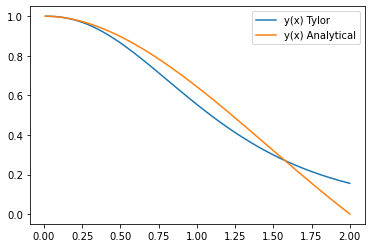

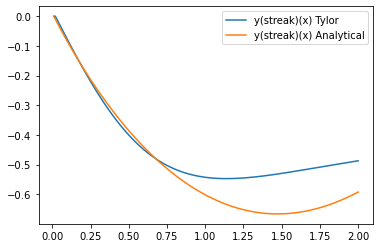

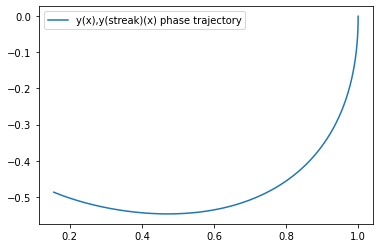

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt("y1.dat")
data2 = np.loadtxt("y2.dat")

fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()

ax1 = fig1.add_subplot()
ax2 = fig2.add_subplot()
ax3 = fig3.add_subplot()

#y(x)
ax1.plot(data1[:,2],data1[:,0], label = 'y(x) Tylor')
ax1.plot(data1[:,2],data1[:,1], label = 'y(x) Analytical')
ax1.legend()

#y'(x)
ax2.plot(data2[:,2],data2[:,0], label = 'y(streak)(x) Tylor')       
ax2.plot(data2[:,2],data2[:,1], label = 'y(streak)(x) Analytical')
ax2.legend()

#Фазовая траектория 
ax3.plot(data1[:,0],data2[:,0],label = 'y(x),y(streak)(x) phase trajectory') 
ax3.legend()

### Файл **lab7.py** 

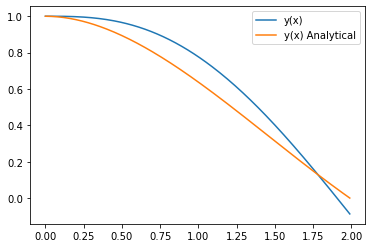

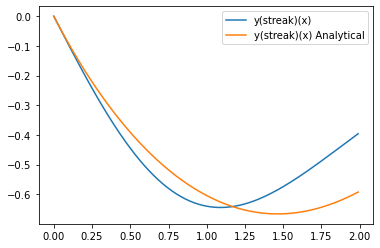

In [7]:
from scipy.integrate import odeint  
import numpy as np                   
import matplotlib.pyplot as plt      
 
def f(u, x):
    y = u[0]
    z = u[1]
    return [z, x*np.exp(-x) - y ]
    
def ff(u, x):
    y = u[1]
    z = u[0]
    return [z,-(x+1)*np.exp(-x) - y*x]

#Аналитическое решение
def analytical1(t):
    return np.cos(t)/2 + (np.exp(-t) * np.cos(t) * (np.cos(t) + t * np.cos(t) + t * np.sin(t)))/2 + (np.exp(-t)*np.sin(t)*(np.sin(t)-t*np.cos(t)+t*np.sin(t)))/2;

def analytical2(t):
    return -(np.exp(t) * np.sin(t) + t) / (2 * np.exp(t))
    

x = np.arange(0.0, 2.0, 0.01)    
y0 = [0.0, 1.0]
y1 = [1.0, 0.0]     
 
solution1 = odeint(f, y0, x)    #встроенная функциия scipy
solution2 = odeint(ff, y1, x)   #встроенная функциия scipy
 
fig1 = plt.figure()
ax1 = fig1.add_subplot()
fig2 = plt.figure()
ax2 = fig2.add_subplot()

ax1.plot(x,solution1[:,1], label = 'y(x)')
ax1.plot(x,analytical1(x), label = 'y(x) Analytical')
ax1.legend()

ax2.plot(x,solution2[:,1], label = 'y(streak)(x)')
ax2.plot(x,analytical2(x), label = 'y(streak)(x) Analytical')
ax2.legend()

### Дополнение 

**Вид аналитического решения**

\begin{equation} 
y(x) =  \frac{cos(x)}{2} +  \frac{exp(-x) * cos(x)*(cos(x) + x*cos(x) +x*sin(x))}{2}  +  \frac{exp(-x)*sin(x) - x*cos(x) + x*sin(t)}{2} 
\end{equation}

\begin{equation} 
y'(x) =  \frac{-exp(-x)*sin(x) + x}{2 * exp(x)} 
\end{equation}


**Вид аналитического решения в виде ряда Тейлора состоящий из 7 членов ряда.**

\begin{equation} 
y(x) = 1 -  \frac{x^{2} }{2} +  \frac{x^{3} }{6} -  \frac{x^{4} }{24} +  \frac{x^{5} }{60} -  \frac{x^{6} }{240} +  \frac{x^{7} }{1260}
\end{equation}


\begin{equation} 
y'(x) = -x +  \frac{x^{2} }{2} -  \frac{x^{3} }{6} +  \frac{x^{4} }{12} -  \frac{x^{5} }{40} -  \frac{x^{6} }{180}
\end{equation}




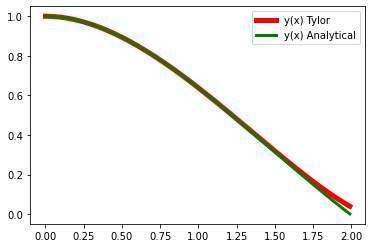

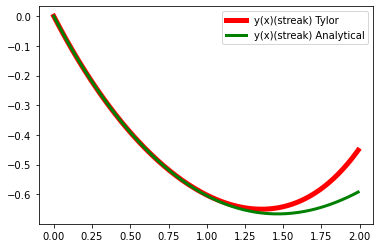

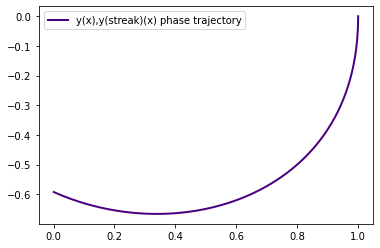

In [11]:
import numpy as np                  
import matplotlib.pyplot as plt     
import math 
from numpy import arange
 

def f(x):
    return 1 - pow(x,2)/2 + pow(x,3)/6 - pow(x,4)/24 + pow(x,5)/60 - pow(x,6)/240 + pow(x,7)/1260

def ff(x): 
    return -x + pow(x,2)/2 - pow(x,3)/6 + pow(x,4)/12 - pow(x,5)/40 + pow(x,6)/180

def af(t):
    return math.cos(t)/2 + (math.exp(-t) * math.cos(t) * (math.cos(t) + t * math.cos(t) + t * math.sin(t)))/2 + (math.exp(-t)*math.sin(t)*(math.sin(t)-t*math.cos(t)+t*math.sin(t)))/2

def aaf(t):
    return -(math.exp(t) * math.sin(t) + t) / (2 * math.exp(t))

x = np.arange(0.0,2.0,0.01)



res1 = []
res2 = []
for i in arange(0,2,0.01):
    res1.append(af(i))
    res2.append(aaf(i))

fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot()
ax2 = fig2.add_subplot()
ax3 = fig3.add_subplot()


ax1.plot(x,f(x),color = 'red',lw = 5,   label = 'y(x) Tylor')
ax1.plot(x,res1,color = 'green',lw = 3, label = 'y(x) Analytical')
ax1.legend()

ax2.plot(x,ff(x),color = 'red',lw = 5,   label = 'y(x)(streak) Tylor')
ax2.plot(x,res2,color = 'green',lw = 3, label = 'y(x)(streak) Analytical')
ax2.legend()

ax3.plot(res1,res2,label = 'y(x),y(streak)(x) phase trajectory',color = 'indigo',lw = 2)
ax3.legend()